In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'../dataset/placement.csv')
dataset.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [4]:
dataset.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

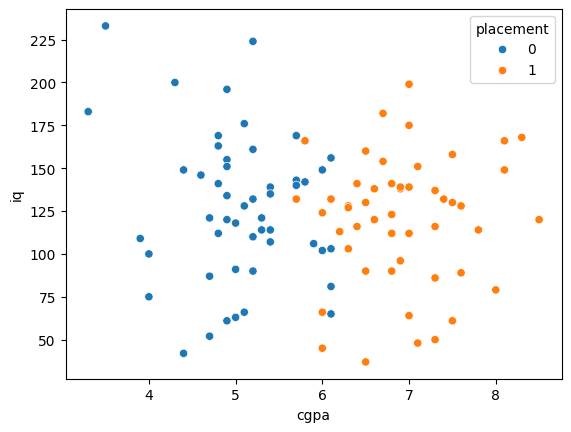

In [5]:
sns.scatterplot(x='cgpa', y='iq', data=dataset, hue='placement')
plt.show()

In [6]:
dataset = dataset.drop(columns=['Unnamed: 0'])
dataset.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
x = dataset.iloc[:, :-1]
y = dataset['placement']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.svm import SVC

In [11]:
sv1 = SVC(kernel='linear')
sv1.fit(x_train, y_train)

SVC(kernel='linear')

In [12]:
sv1.score(x_train, y_train)*100,sv1.score(x_test, y_test)*100

(90.66666666666666, 96.0)

In [13]:
from mlxtend.plotting import plot_decision_regions

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

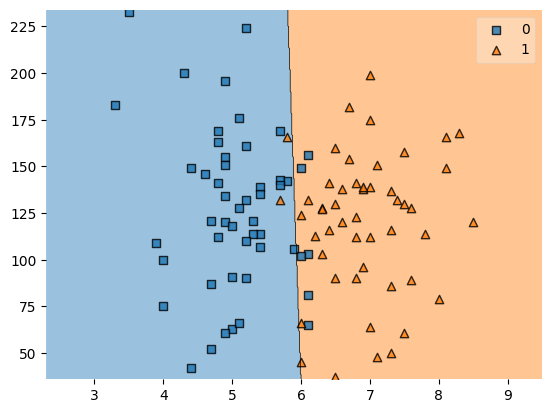

In [14]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=sv1)

In [15]:
sv2 = SVC(kernel='poly', degree=5)
sv2.fit(x_train, y_train)

SVC(degree=5, kernel='poly')

In [16]:
sv2.score(x_train, y_train)*100, sv2.score(x_test, y_test)*100

(72.0, 60.0)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

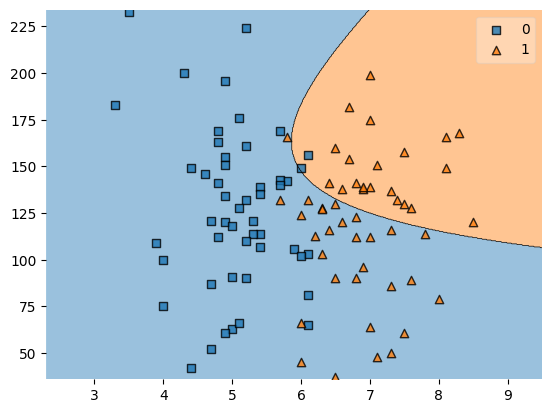

In [17]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=sv2)

In [18]:
sv3 = SVC(kernel='rbf')
sv3.fit(x_train, y_train)

SVC()

In [19]:
sv3.score(x_train, y_train)*100, sv3.score(x_test, y_test)*100

(56.00000000000001, 36.0)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

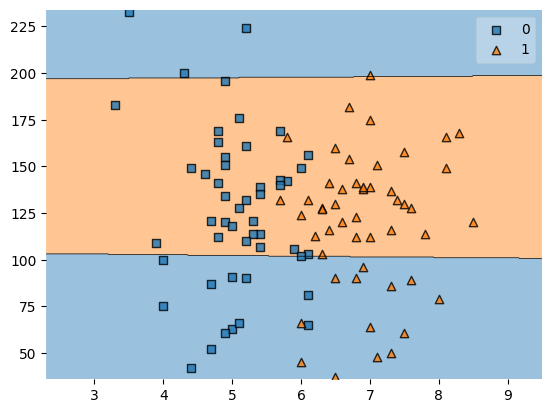

In [20]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=sv3)

In [21]:
sv4 = SVC(kernel='sigmoid')
sv4.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [22]:
sv4.score(x_train, y_train)*100, sv4.score(x_test, y_test)*100

(52.0, 44.0)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

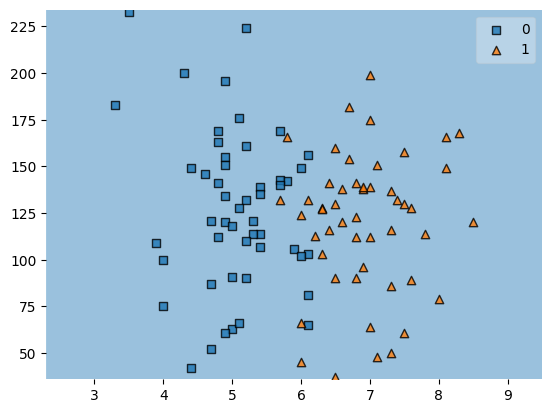

In [23]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=sv4)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cf =confusion_matrix(y_test, sv1.predict(x_test))

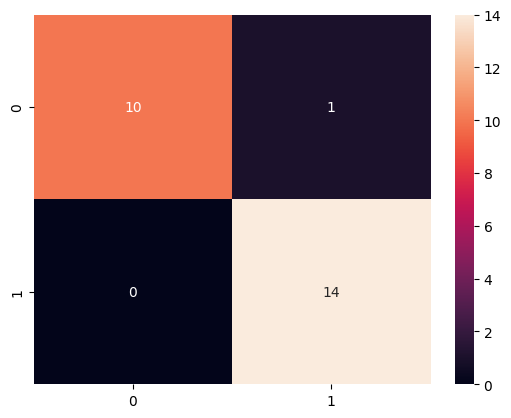

In [27]:
sns.heatmap(cf, annot=True)
plt.show()